<a href="https://colab.research.google.com/github/anandhu013/Cifar_10_3models/blob/main/Cifar_10_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import Reshape
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.layers import Input
from tensorflow.keras.layers import Activation

170508288/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


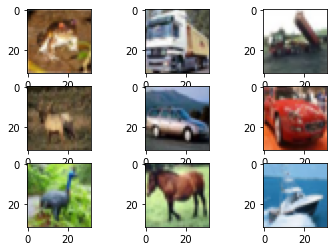

In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [3]:
num_classes=10
learning_rate=0.001
momentum=0.9
trainy = np_utils.to_categorical(trainy, num_classes)
testy = np_utils.to_categorical(testy, num_classes)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX  /= 255.0
testX /= 255.0

In [4]:
def netA_model():
  netA=Sequential()
  netA.add(InputLayer(input_shape=(32,32,3,)))
  netA.add(Flatten())
  netA.add(Dense(num_classes,activation='softmax'))
  return netA

In [5]:
def train(model,trainX,trainy,testX,testy,num_epochs=50,learning_rate=learning_rate,compute_accs=True):
  opt=SGD(learning_rate=learning_rate,momentum=momentum)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(trainX,trainy,batch_size=32,epochs=50,validation_data=(testX,testy))
  return history

In [11]:
def plot_history_single(history,net_name):
  plt.plot(history.history['accuracy'])
  plt.title(net_name+' train accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train'])
  plt.show()

  plt.plot(history.history['val_accuracy'])
  plt.title(net_name+' test accuracy')
  plt.xlabel('epoch')
  plt.ylabel('val_accuracy')
  plt.legend(['test'])
  plt.show()

In [7]:
def plot_history(histories):
  for obj in histories:
    plot_history_single(obj['accs'],obj['name'])

In [8]:
def netB_model():
  netB=Sequential()
  netB.add(InputLayer(input_shape=(32,32,3,)))
  netB.add(Flatten())
  netB.add(Dense(300,activation='relu'))
  netB.add(Dense(10,activation='softmax'))
  return netB

In [9]:
from keras.models import Model
def netC_model():
  inp = Input(shape=(32,32,3))
  model=Conv2D(25,(5,5),activation='relu')(inp)
  model=MaxPooling2D((2,2),2)(model)
  model=Flatten()(model)
  out=Dense(10,activation='softmax')(model)
  netC=Model(inputs=inp,outputs=out)
  return netC

==== Training Sequential ====
Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0119 - accuracy: 0.2767 - val_loss: 1.8172 - val_accuracy: 0.3626
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8188 - accuracy: 0.3619 - val_loss: 1.7925 - val_accuracy: 0.3783
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7875 - accuracy: 0.3807 - val_loss: 1.7850 - val_accuracy: 0.3873
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7662 - accuracy: 0.3875 - val_loss: 1.7767 - val_accuracy: 0.3768
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7595 - accuracy: 0.3936 - val_loss: 1.7443 - val_accuracy: 0.3884
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7428 - accuracy: 0.3964 - val_loss: 1.7517 - val_accuracy: 0.3947
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7436 - accuracy: 0.3969 - va

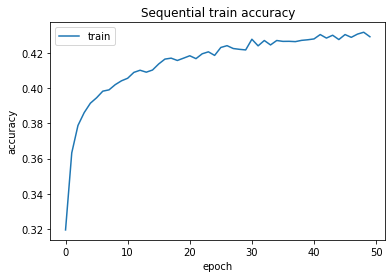

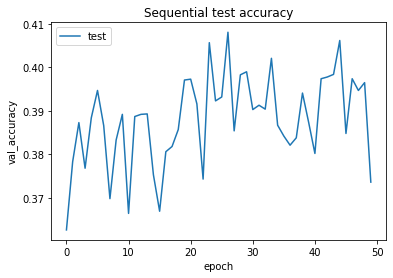

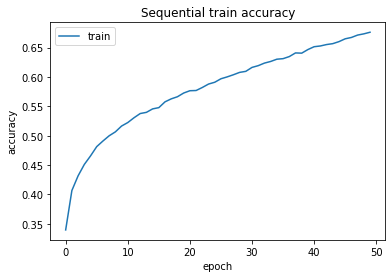

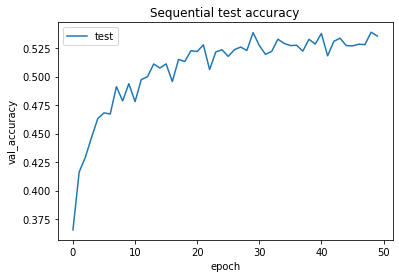

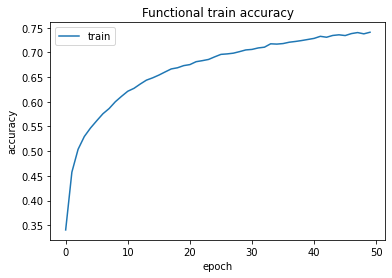

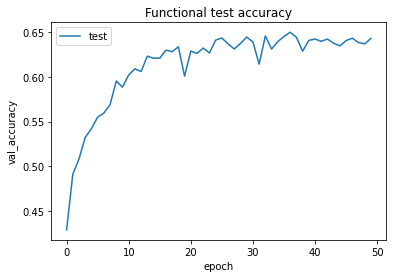

In [13]:
nets = [netA_model(), netB_model(), netC_model()]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training {net_name} ====')
  history= train(net, trainX,trainy,testX,testy,num_epochs=50,learning_rate=learning_rate,compute_accs=True)
  histories.append({'name': net_name,'net': net,'accs': history})
plot_history(histories)